In [88]:
import sys
sys.path.append("..")

# Reload modules in /src/ when changed
%load_ext autoreload
%autoreload 2


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (12, 2)
import seaborn as sns
sns.set(style="ticks", palette="tab10")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
from torch.utils.data import Dataset
import torch

class NextReturnRegrDataset(Dataset):
    def __init__(self, ohlcv: pd.DataFrame, lookback: int):

        self.lookback = lookback
        r = np.log(ohlcv["close"]).diff().bfill().to_numpy()
        # close = ohlcv["close"].to_numpy()
        
        self.X = (
            np.lib.stride_tricks.sliding_window_view(r, lookback)
            .reshape((-1, lookback, 1))
            .astype(np.float32)
        )

        self.y = np.array(r[lookback:], dtype=np.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, i):
        return (
            torch.from_numpy(self.X[i]),
            torch.tensor(self.y[i]),
            i,
        )


In [90]:
data = pd.read_pickle('../data/processed/USDJPY-5m-20240101-20241231_FEATURES.pkl')

In [91]:
data['close_log_return'].describe()

count    73782.000000
mean         0.000001
std          0.000390
min         -0.013869
25%         -0.000137
50%          0.000003
75%          0.000144
max          0.011866
Name: close_log_return, dtype: float64

In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [93]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [94]:
data['close_log_return_norm'] = scaler.fit_transform(data['close_log_return'].values.reshape(-1, 1))

In [95]:
data['close_log_return_norm'].describe()

count    73782.000000
mean         0.077933
std          0.030293
min         -1.000000
25%          0.067226
50%          0.078095
75%          0.089009
max          1.000000
Name: close_log_return_norm, dtype: float64

<Axes: >

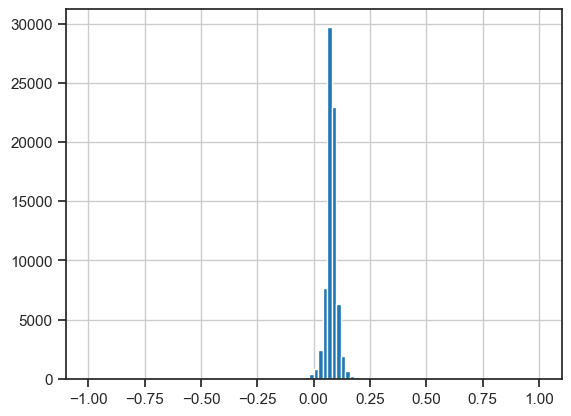

In [96]:
data['close_log_return_norm'].hist(bins=100)

In [87]:
dataset = NextReturnRegrDataset(data, lookback=24)